# K-Means 分群

使用 K-Means 來解分群問題。

我們使用的資料集是 sklearn 內建的手寫數字資料集。

## 先使用簡單的例子看分群

In [1]:
# 引入 K-Meand
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# 引入 silhouette_score 及 matplot
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
# 分割出 3*2 個圖，並在 1 號圖上作圖
fig = plt.figure(figsize=(18, 32), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(3, 2, 1)

In [4]:
# 初始化數據點
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(zip(x1, x2)).reshape(len(x1), 2)

In [5]:
X

array([[1, 1],
       [2, 3],
       [3, 2],
       [1, 2],
       [5, 8],
       [6, 6],
       [5, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [7, 1],
       [9, 3]])

In [6]:
# 在 1 號圖上畫上數據點分佈
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

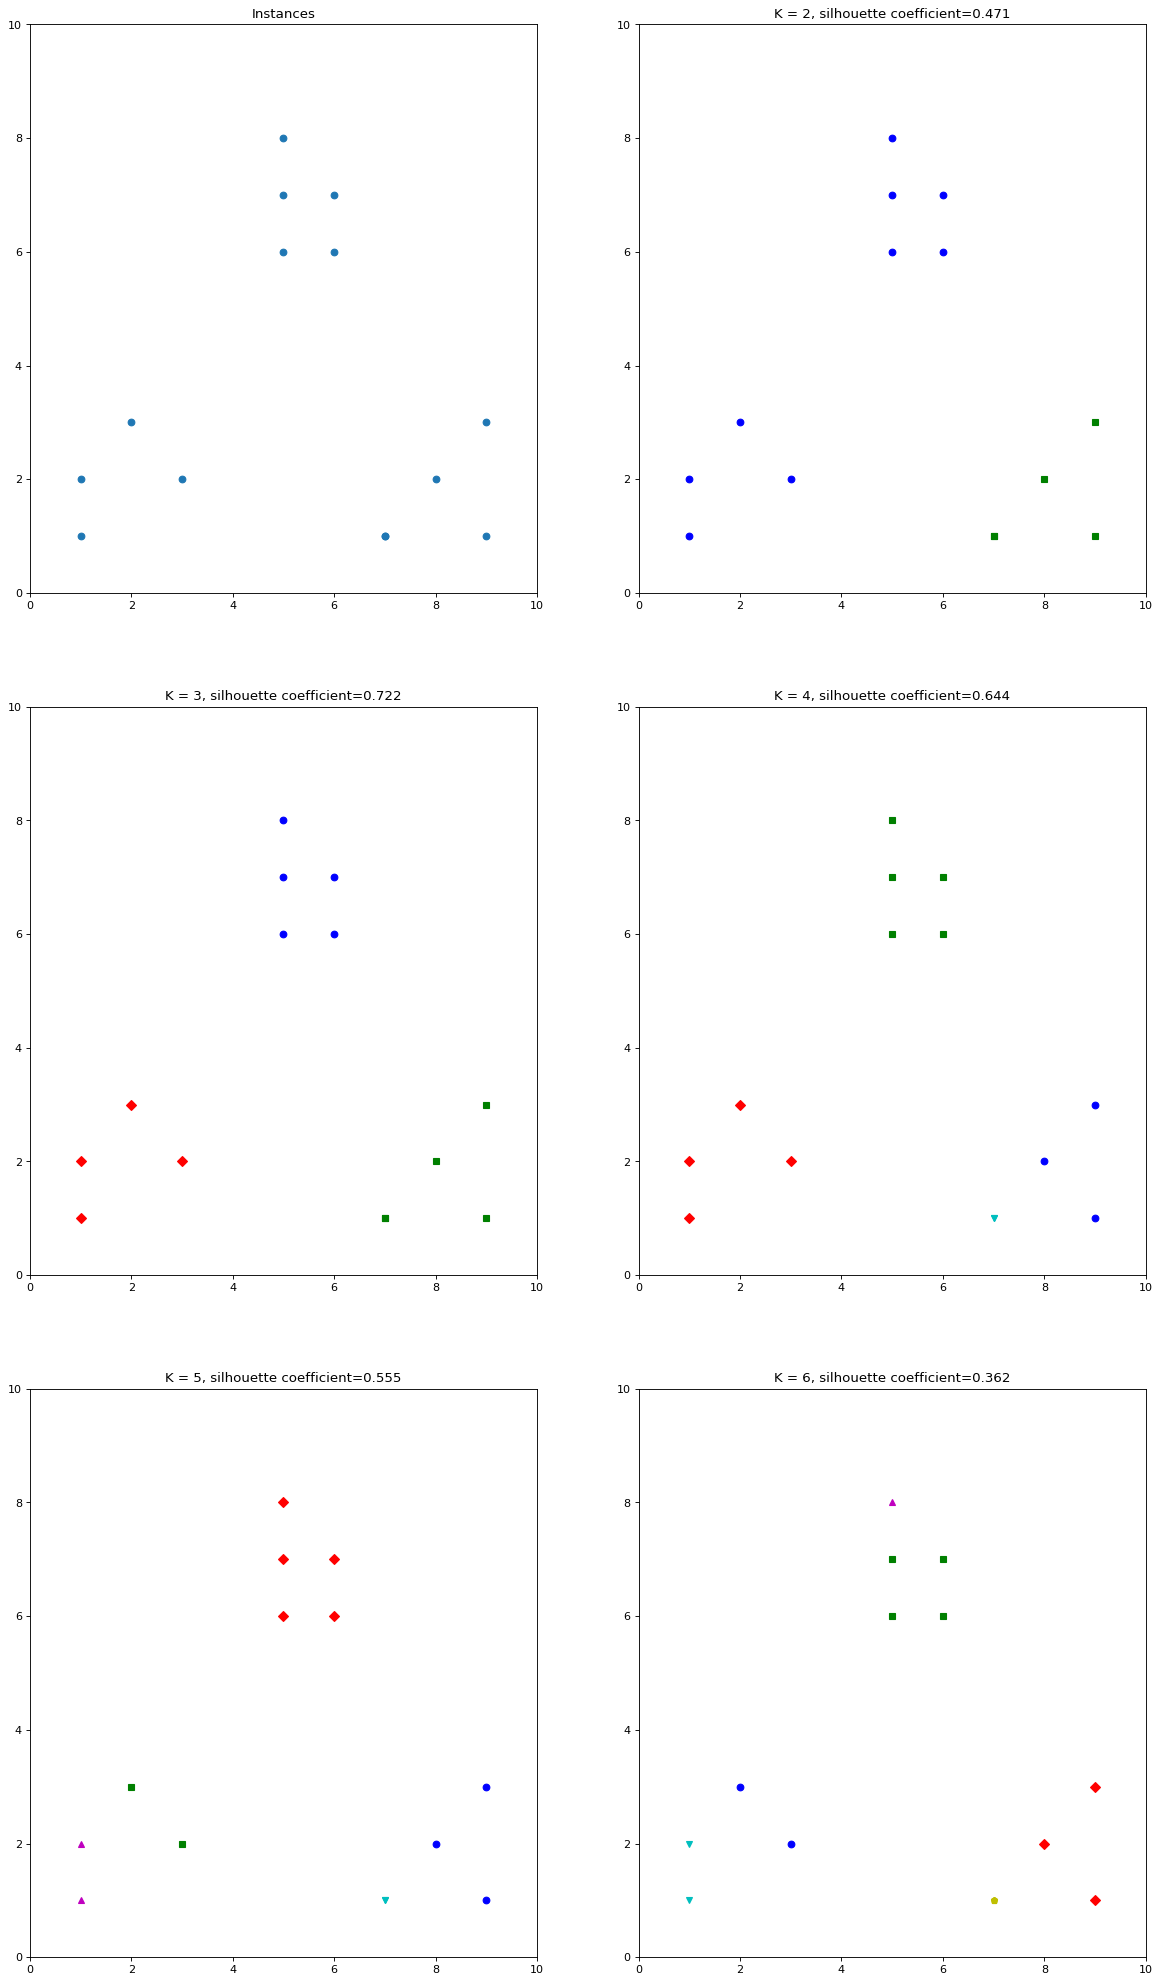

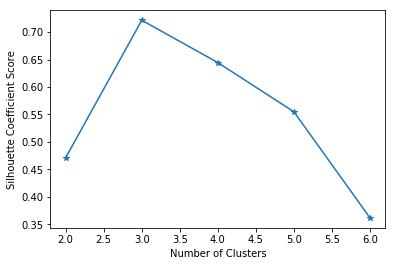

In [7]:
# 在 2 - 6 號圖上各個 K-Means 分群結果
clusters = [2, 3, 4, 5, 6]
subplot_counter = 1
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters = t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K = %s, silhouette coefficient=%0.03f' % (t, sc_score))
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()

In [8]:
# 預測
kmeans_model = KMeans(3).fit(X)
print(kmeans_model.predict(X))

[0 0 0 0 2 2 2 2 2 1 1 1 1 1]


## 手寫數字分群

In [9]:
# 從 sklearn.dataset 載入手寫數字資料集
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=33)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/Users/fukuball/Projects/Hands-on-AI-Tools-env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
fig = plt.figure(figsize=(18, 32), dpi= 80, facecolor='w', edgecolor='k')

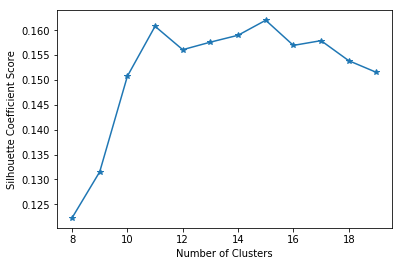

In [12]:
clusters = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
sc_scores = []
for t in clusters:
    kmeans_model = KMeans(n_clusters = t).fit(X_train)
    sc_score = silhouette_score(X_train, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()